# Exploratory Analysis

In [1]:
%run init.ipynb

## Distributions

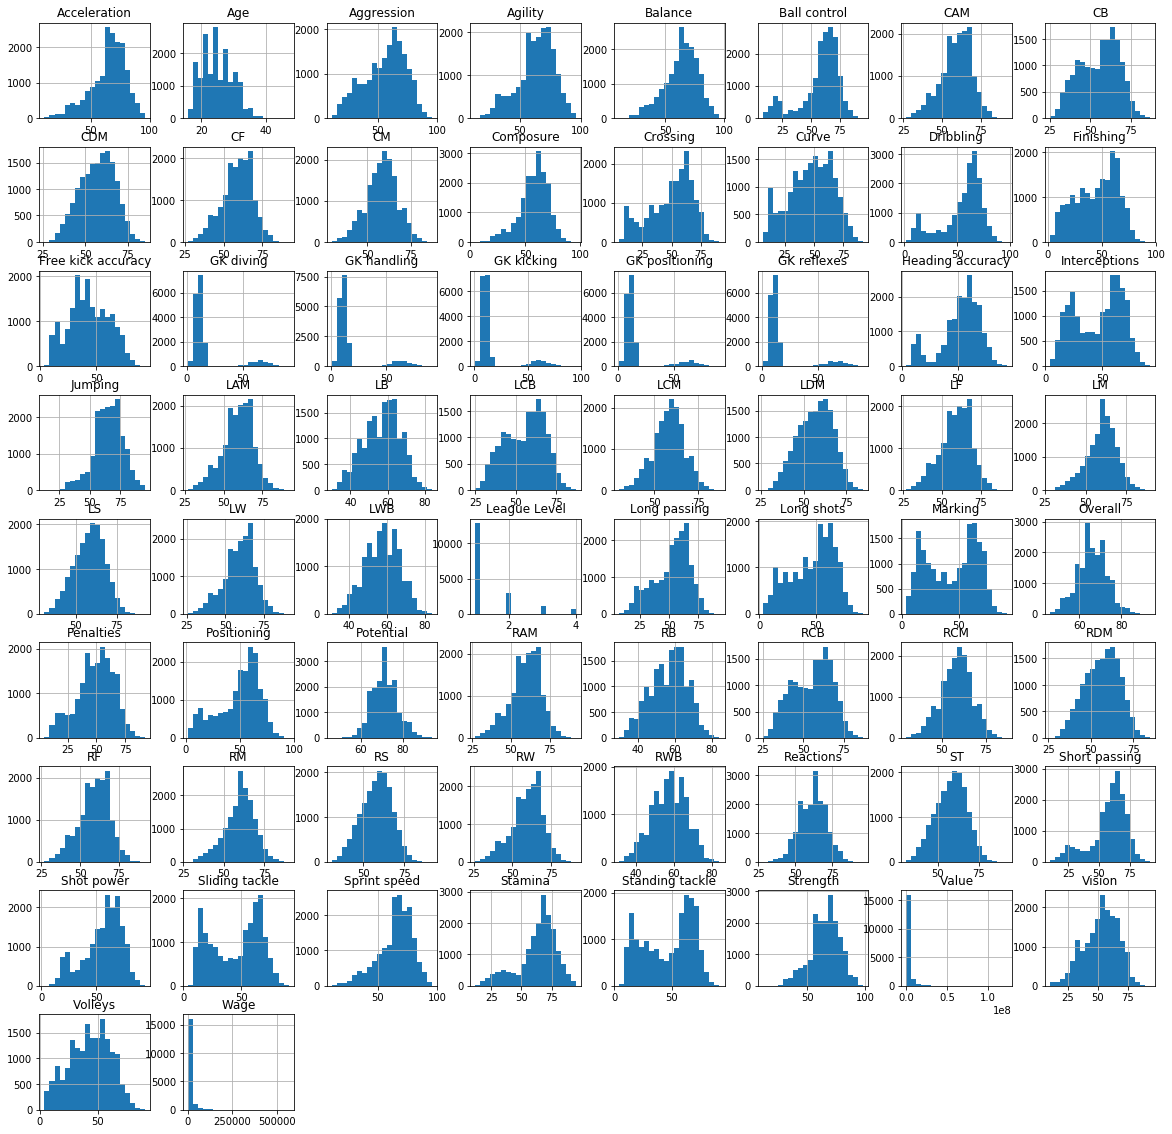

In [2]:
df.hist(bins=20, figsize=(20,20));

Apart from goal keeping attributes, let's pick unusual distributions, and see what different peeks correspond to. Start with goalkeepers.

In [2]:
dfGK = df[df['Preferred Positions'] == 'GK'];
dfNotGK = df[df['Preferred Positions'] != 'GK'];

In [4]:
distCols = ['Crossing', 'Dribbling', 'Finishing', 'Heading accuracy',
            'Interceptions', 'Marking', 'Positioning', 'Short passing',
            'Shot power', 'Sliding tackle', 'Stamina', 'Standing tackle'];
distColsPos = ['CB', 'LCB', 'RCB']; #can not be ralated to goalkeepers

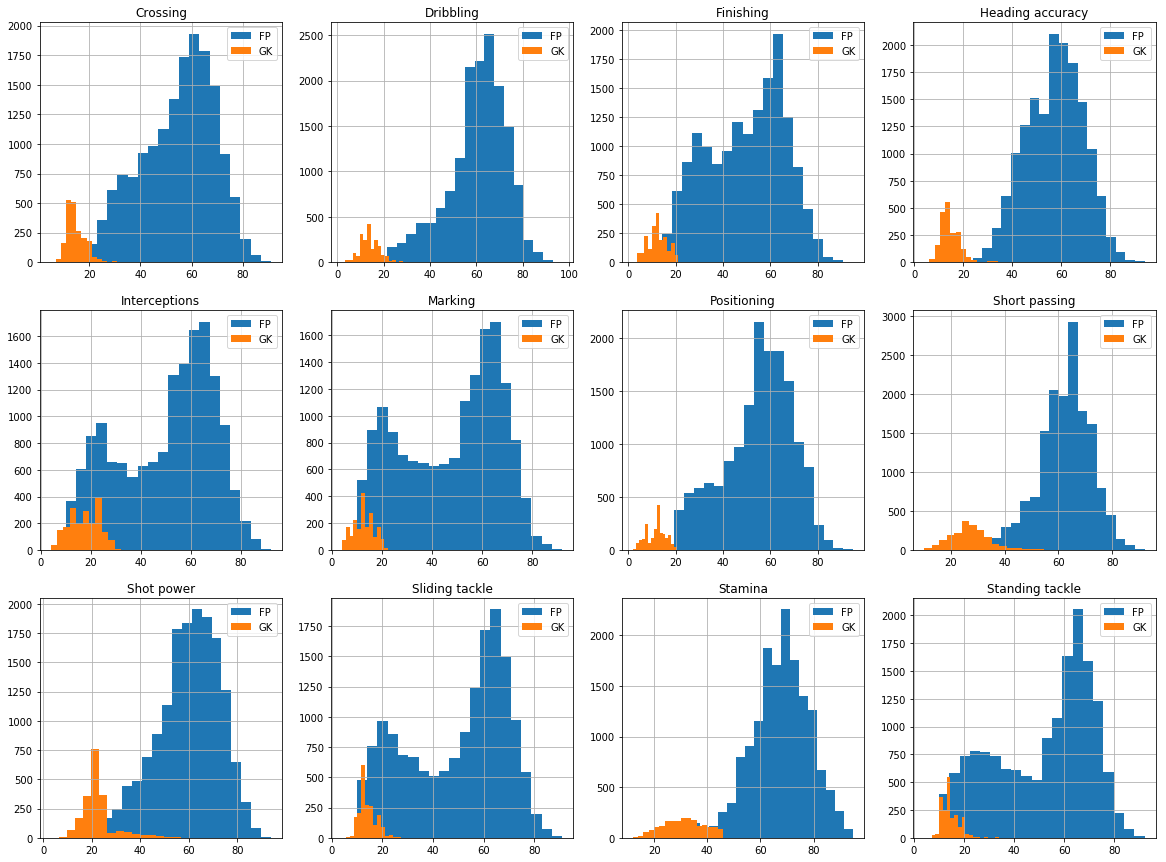

In [5]:
plt.figure(figsize=(20,15));
for i, col in enumerate(distCols):
    plt.subplot(3, 4, i+1);
    plt.title(col)
    dfNotGK[col].hist(bins=20);
    dfGK[col].hist(bins=20);
    plt.legend(['FP','GK'])

Some histograms separated, but a few still need explaining. Let's try other positions

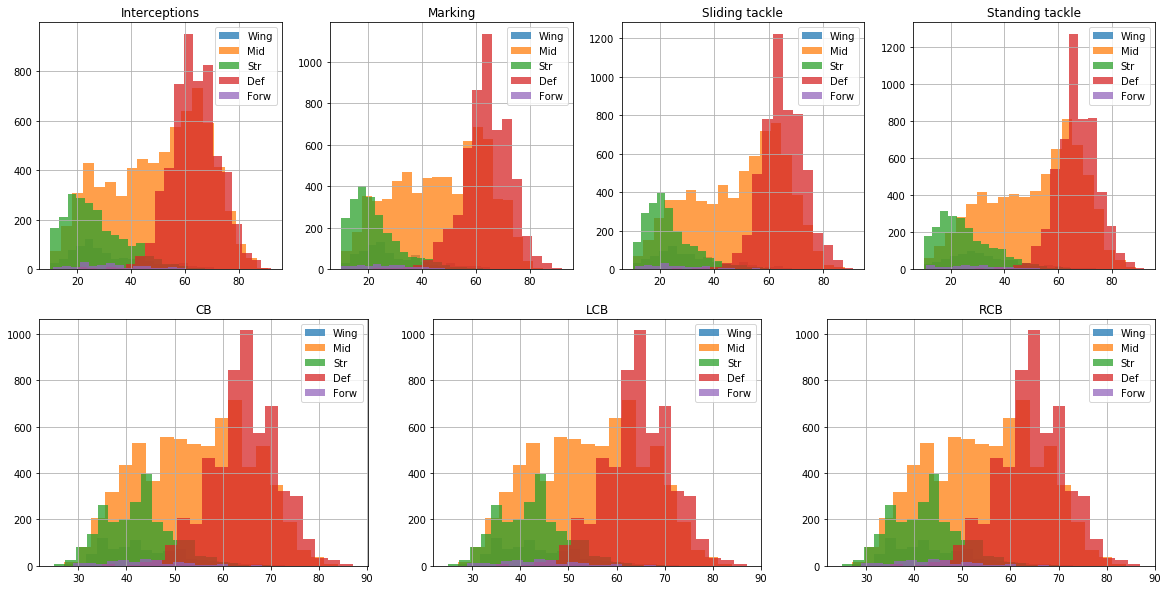

In [6]:
distColsOther = ['Interceptions', 'Marking', 'Sliding tackle', 'Standing tackle'];
# sets randomly chage order
positions = ['W', 'M', 'T', 'B', 'F']; #{pos[-1] for pos in dfNotGK['Preferred Positions'].unique()};
posNames = ['Wing', 'Mid', 'Str', 'Def', 'Forw'];
plt.figure(figsize=(20,10));
for i, col in enumerate(distColsOther):
    plt.subplot(2, 4, i+1);
    plt.title(col);
    for pos in positions:
        dfNotGK[dfNotGK['Preferred Positions'].str[-1] == pos][col].hist(bins=20, alpha=0.75);
    plt.legend(posNames);
for i, col in enumerate(distColsPos):
    plt.subplot(2, 3, i+4);
    plt.title(col);
    for pos in positions:
        dfNotGK[dfNotGK['Preferred Positions'].str[-1] == pos][col].hist(bins=20, alpha=0.75);
    plt.legend(posNames);

We can see, that all of these are almost the same. Defenders have a high scores (last 3 are basicly defence positions) and strikers have low scores. Midfielders have different values for these attributes.

## Correlations

In [7]:
correlations = df.loc[:,'Age':'Volleys'].corr();

Graphical representation of correlation matrix

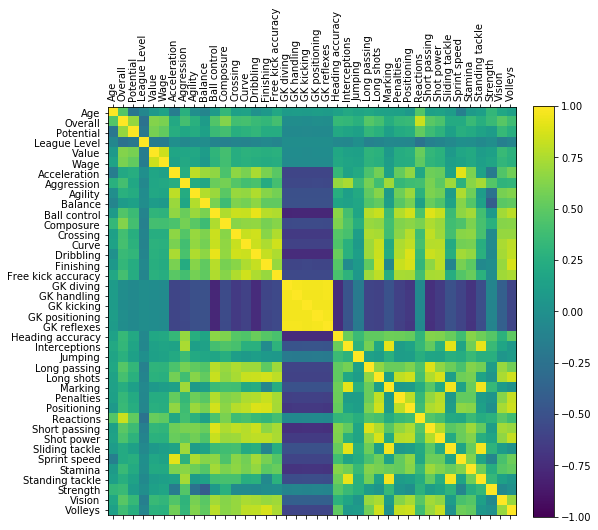

In [8]:
def plotCorrMatrix(correlations, fig, subplot=111):
    names = list(correlations.columns);
    ax = fig.add_subplot(subplot);
    cax = ax.matshow(correlations, vmin=-1, vmax=1);
    fig.colorbar(cax, fraction=0.046, pad=0.04); #alignment
    ticks = np.arange(0,len(names));
    ax.set_xticks(ticks);
    ax.set_yticks(ticks);
    ax.set_xticklabels(names, rotation='vertical');
    ax.set_yticklabels(names);

plotCorrMatrix(correlations, plt.figure(figsize=(8,8)));

There are some strongly negatively correlated regions, let's see why.

These variables correspond to goalkeeper's properties, so we can split the data.

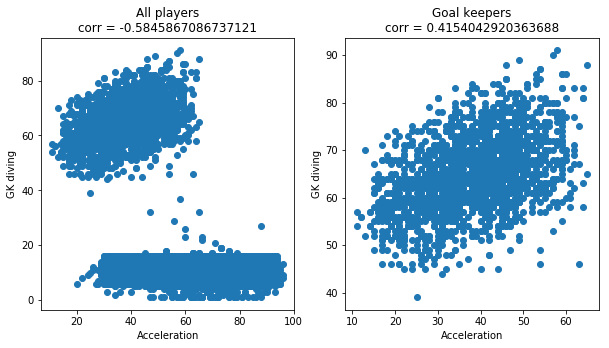

In [9]:
plt.figure(figsize=(10,5));
plt.subplot(1,2,1);
plt.title('All players\ncorr = {}'.format(df['Acceleration'].corr(df['GK diving'])));
plt.scatter(df['Acceleration'], df['GK diving']);
plt.xlabel('Acceleration');
plt.ylabel('GK diving');
plt.subplot(1,2,2);
plt.title('Goal keepers\ncorr = {}'.format(dfGK['Acceleration'].corr(dfGK['GK diving'])));
plt.scatter(dfGK['Acceleration'], dfGK['GK diving']);
plt.xlabel('Acceleration');
plt.ylabel('GK diving');

This is an example of Simpson's paradox. We have positiove correlation for one cluster(goalkeepers), almost no correlation for others, and the resultiong data appears to be negatively correlated.

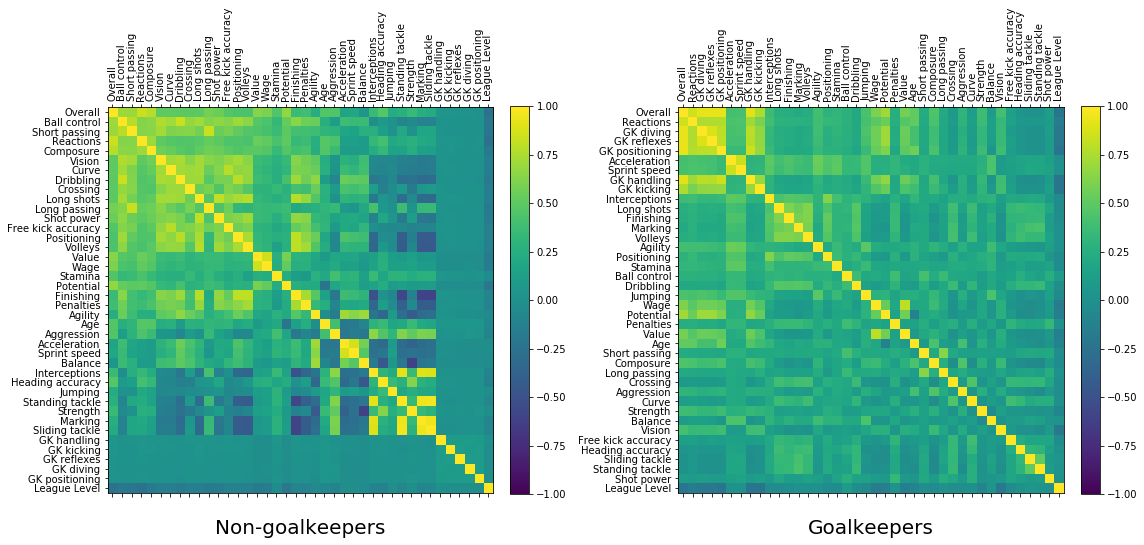

In [10]:
corrGK = dfGK.loc[:,'Age':'Volleys'].corr();
corrNotGK = dfNotGK.loc[:,'Age':'Volleys'].corr();

order = (-corrGK.mean()).argsort();
corrGK = corrGK.iloc[order, order];
order = (-corrNotGK.mean()).argsort();
corrNotGK = corrNotGK.iloc[order, order];

fig = plt.figure(figsize=(16,8));

plotCorrMatrix(corrNotGK, fig, 121);
plt.xlabel('\nNon-goalkeepers', size=20);
plotCorrMatrix(corrGK, fig, 122);
plt.xlabel('\nGoalkeepers', size=20);

plt.tight_layout();

In these plots columns and rows are sorted by average correlation values. General observations: Overall rating has the highest correlation average, meaning that the higher are the attributes, the higher the overall rating will be. The lowest(highest negative) correlation average has league level, i.e. the higher parameter correspond to smaller number(higher level) of league, 1 beeing the best league.

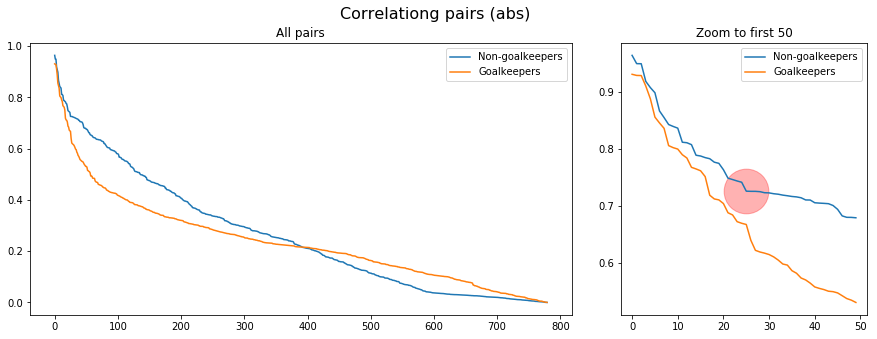

In [11]:
def sortCorrelations(corrMat):
    corrValues = corrMat.abs().unstack();
    relativeIndices = [(i, j) for i, j in corrValues.index if i < j];
    mostVals = corrValues[relativeIndices].sort_values(ascending=False);
    return mostVals;

mostNotGK = sortCorrelations(corrNotGK);
mostGK = sortCorrelations(corrGK);

labels = ['Non-goalkeepers', 'Goalkeepers'];
plt.figure(figsize=(15,5));
plt.suptitle('Correlationg pairs (abs)', size=16);
plt.subplot2grid((1, 3), (0, 0), colspan=2);
plt.title('All pairs');
plt.plot(mostNotGK.values);
plt.plot(mostGK.values);
plt.legend(labels);
plt.subplot2grid((1, 3), (0, 2));
plt.title('Zoom to first 50');
plt.plot(mostNotGK[:50].values);
plt.plot(mostGK[:50].values);
elbow = 25;
plt.scatter(elbow, mostNotGK[elbow], s=2000, color='r', alpha=0.3)
plt.legend(labels);

On this plot can the the 'elbow' change in behavior, meaning, that we should consider about first 25 pairs.

In [12]:
print('    Non-goalkeepers');
print(mostNotGK[:elbow]);
print('    Goalkeepers');
print(mostGK[:elbow]);

    Non-goalkeepers
Sliding tackle  Standing tackle       0.963862
Marking         Sliding tackle        0.949337
                Standing tackle       0.949175
Interceptions   Standing tackle       0.918241
                Marking               0.907352
                Sliding tackle        0.898354
Acceleration    Sprint speed          0.866429
Value           Wage                  0.854801
Long passing    Short passing         0.842618
Ball control    Dribbling             0.839257
Overall         Reactions             0.836261
Finishing       Volleys               0.811596
                Positioning           0.810713
Long shots      Shot power            0.807364
Ball control    Short passing         0.788788
Finishing       Long shots            0.787436
Dribbling       Positioning           0.784628
Curve           Free kick accuracy    0.782703
Composure       Overall               0.776615
Long shots      Volleys               0.774582
Ball control    Vision                0.

Something unusual?

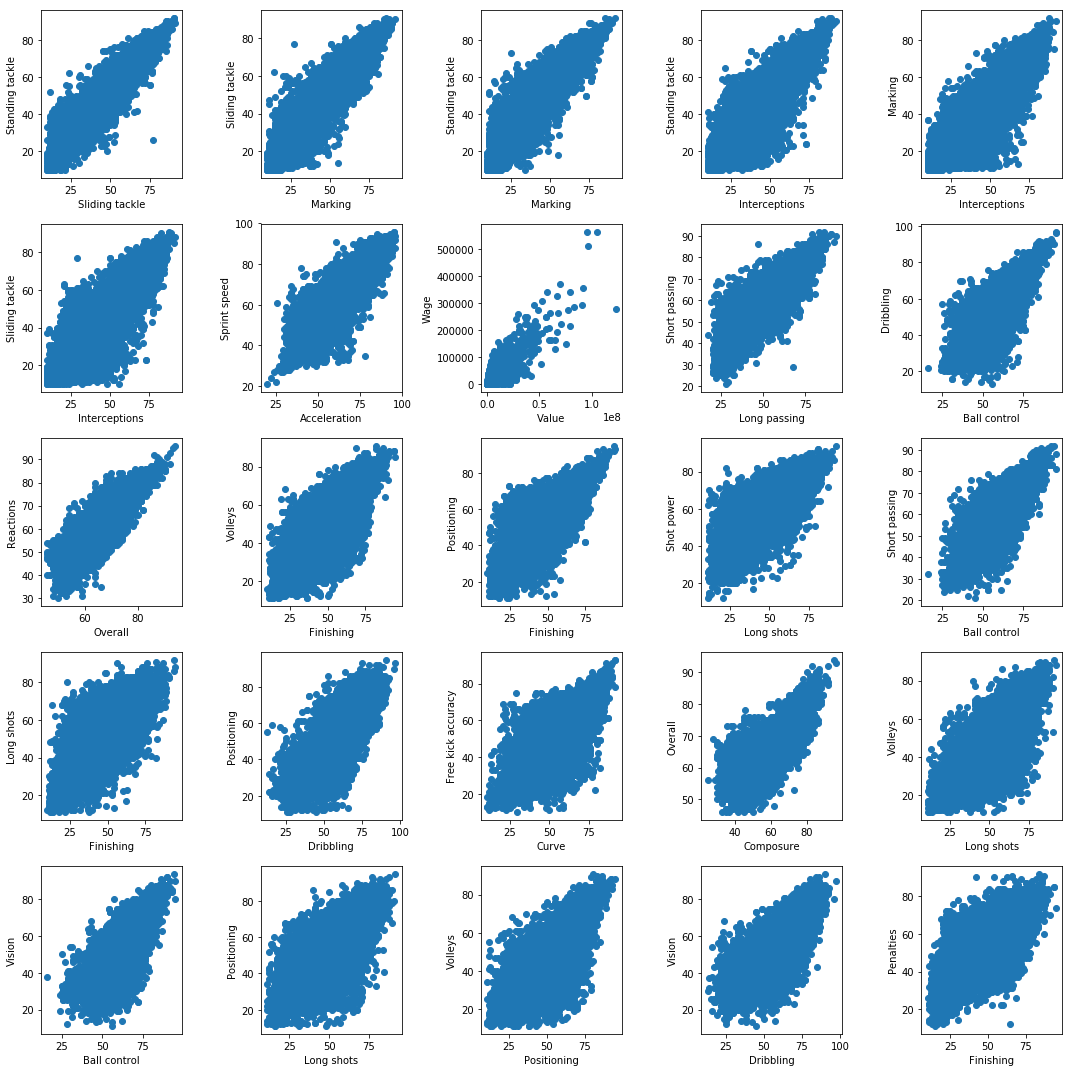

In [13]:
plt.figure(figsize=(15,15));
for i,(a,b) in enumerate(mostNotGK[:elbow].index):
    plt.subplot(5, 5, i+1);
    plt.scatter(dfNotGK[a], dfNotGK[b]);
    plt.xlabel(a);
    plt.ylabel(b);
plt.tight_layout()

In [14]:
intersectionIndex = mostNotGK[:elbow].index.intersection(mostGK[:elbow].index);
pd.DataFrame({'Non-goalkeeper':mostNotGK[intersectionIndex], 'Goalkeeper':mostGK[intersectionIndex]})

Goalkeeper  Non-goalkeeper
Acceleration Sprint speed    0.835950        0.866429
Overall      Reactions       0.855606        0.836261
Value        Wage            0.802074        0.854801

Interesting plot to look at might be Value to Wage

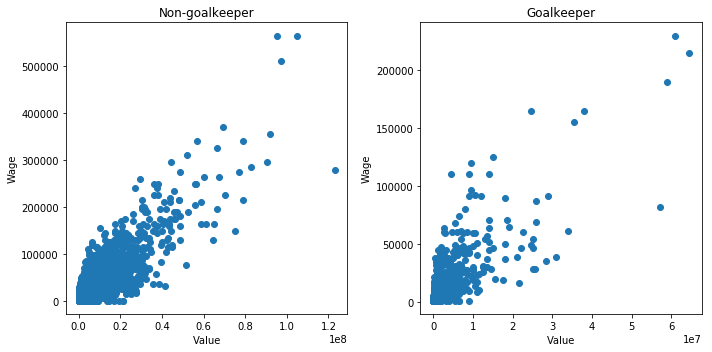

In [15]:
plt.figure(figsize=(10, 5));
aCol = 'Value';
bCol = 'Wage';
plt.subplot(1, 2, 1);
plt.title('Non-goalkeeper');
plt.scatter(dfNotGK[aCol], dfNotGK[bCol]);
plt.xlabel(aCol);
plt.ylabel(bCol);
plt.subplot(1, 2, 2);
plt.title('Goalkeeper');
plt.scatter(dfGK[aCol], dfGK[bCol]);
plt.xlabel(aCol);
plt.ylabel(bCol);
plt.tight_layout();

We can see linear relation, but with exponential grow, meaning, as the value(wage) increases, the number of such players decreses. It is consistent across all players.

We can make another assumpion, based on normal distribution of overall rating. Wage of players increases exponentially with their rating. We did not see it in the correlations as we were looking for linear dependencies.

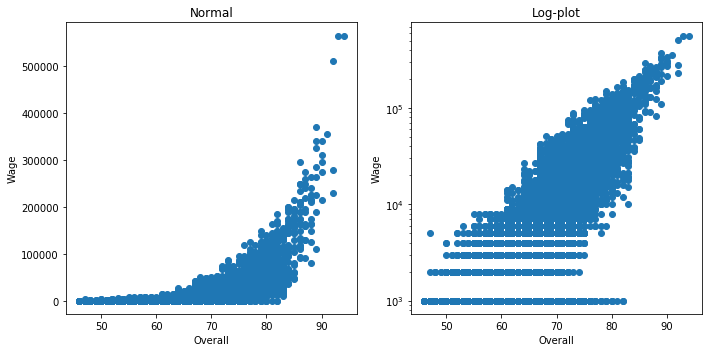

In [16]:
plt.figure(figsize=(10, 5));
aCol = 'Overall';
bCol = 'Wage';
plt.subplot(1, 2, 1);
plt.title('Normal');
plt.scatter(df[aCol], df[bCol]);
plt.xlabel(aCol);
plt.ylabel(bCol);
plt.subplot(1, 2, 2);
plt.title('Log-plot');
plt.scatter(df[aCol], df[bCol]);
plt.xlabel(aCol);
plt.ylabel(bCol);
plt.yscale('log');
plt.tight_layout();

Triangular shape of the log-plot means thet there are a lot of underpaid players(some players with rating over 80 get the minimum wage, while with exponential trend, they shold have been payes 100 times that). Later we will look where they are!

Let's look for correlations within groups of attributes. Groups are defined as follows:

In [17]:
pd.DataFrame.from_dict(groups, orient='index').fillna(value='').T

Attacking               Skill      Movement       Power  \
0          Crossing           Dribbling  Acceleration  Shot power   
1         Finishing               Curve  Sprint speed     Jumping   
2  Heading accuracy  Free kick accuracy       Agility     Stamina   
3     Short passing        Long passing     Reactions    Strength   
4           Volleys        Ball control       Balance  Long shots   
5                                                                   

       Mentality        Defending     Goalkeeping  
0     Aggression          Marking       GK diving  
1  Interceptions  Standing tackle     GK handling  
2    Positioning   Sliding tackle      GK kicking  
3         Vision                   GK positioning  
4      Penalties                      GK reflexes  
5      Composure

In [18]:
inGroupCorr = {gr: [df[col1].corr(df[col2]) for col1 in groups[gr] for col2 in groups[gr] if col1 != col2] for gr in groups};
pd.DataFrame({gr: {
    'min': np.min(inGroupCorr[gr]),
    'avg': np.average(inGroupCorr[gr]),
    'max': np.max(inGroupCorr[gr])
} for gr in groups}).T

avg       max       min
Attacking    0.645355  0.879123  0.471695
Defending    0.964835  0.972461  0.960983
Goalkeeping  0.967189  0.972544  0.962595
Mentality    0.486891  0.800049  0.112506
Movement     0.537259  0.915451  0.138386
Power        0.344670  0.879744  0.043771
Skill        0.788988  0.932669  0.705563

Most parameters in groups have high correlation. No negative values means, that groups are well defined and describe relative attributes. Power and mentality are low. For the latter it is ok, as mental characteristic may vary. And power group may need reforming

In [19]:
df[groups['Power']].corr()

Shot power   Jumping   Stamina  Strength  Long shots
Shot power    1.000000  0.171220  0.618315  0.166326    0.879744
Jumping       0.171220  1.000000  0.346877  0.264739    0.114892
Stamina       0.618315  0.346877  1.000000  0.249092    0.591725
Strength      0.166326  0.264739  0.249092  1.000000    0.043771
Long shots    0.879744  0.114892  0.591725  0.043771    1.000000

Strength and Jumping look like they do not belong to this group. But they still will be, because they represent Power characteristics. What is interesting, that Strength is not correlated with Shot power or even more with Long shots. ???

In [20]:
df[groups['Movement']].corr().unstack().sort_values()[:6:2]

Reactions     Balance         0.138386
Acceleration  Reactions       0.190832
Reactions     Sprint speed    0.194464
dtype: float64

From this we can note, thet Acceleration does not influence Reactions

Correlations also may be complex, i.e. involve more than two attributes.

We can look for other correlations, but we need to normalize all columns, as we will take their difference. If some of the variable are correlated by themselves, we cosider a group, only if it is higher

In [21]:
primaryDf = dfGK.loc[:,'Age':'Volleys'].select_dtypes(include=[np.number]);
primaryDf = primaryDf.loc[:, primaryDf.columns.str[:2] != 'GK']
normDf = (primaryDf - primaryDf.mean()) / primaryDf.max();
diffCorr = {};
n = len(normDf.columns);
for i in range(n):
    for j in range(i+1, n):
        for k in range(n):
            if (k != i and k != j):
                a = normDf.columns[i];
                b = normDf.columns[j];
                c = normDf.columns[k];
                abcCorr = (normDf[a] - normDf[b]).corr(normDf[c]);
                if (abs(corrNotGK[a][b]) < abs(abcCorr) and
                    abs(corrNotGK[b][c]) < abs(abcCorr) and
                    abs(corrNotGK[c][a]) < abs(abcCorr)):
                    diffCorr[a,b,c] = abcCorr;

In [22]:
dcSer = pd.Series(diffCorr)
mostDiff = dcSer[(-dcSer.abs()).sort_values().index].head((dcSer.abs()>0.6).sum());
mostDiff

Overall    Potential  Age          0.863126
Age        Overall    Potential   -0.723560
Potential  Reactions  Age         -0.692081
Age        Reactions  Potential   -0.677630
dtype: float64

Axes are normalized!


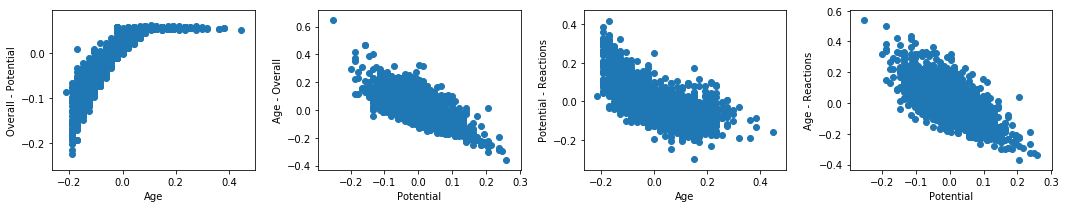

In [23]:
plt.figure(figsize=(15,3));
for i,(a,b,c) in enumerate(mostDiff.index):
    plt.subplot(1, 4, i+1);
    plt.scatter(normDf[c], normDf[a]-normDf[b]);
    plt.ylabel('{} - {}'.format(a,b));
    plt.xlabel(c);
plt.tight_layout()
print('Axes are normalized!')

Age negatively correlates with remaining potential: the younger you are, the more potential you have.

Correlation: -0.862786469354


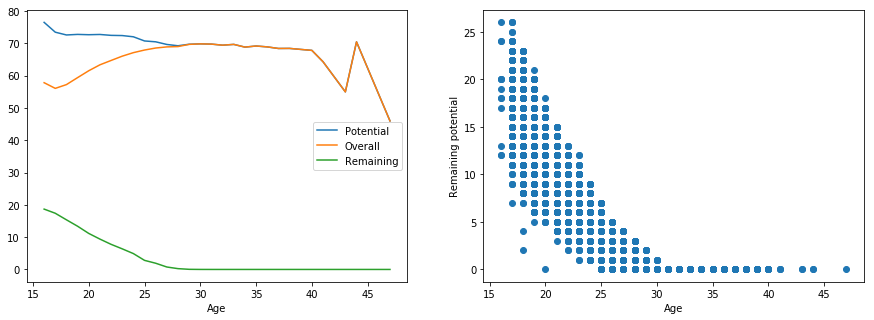

In [24]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1);
ageGroups = df.groupby('Age');
plt.plot(ageGroups['Potential'].mean());
plt.plot(ageGroups['Overall'].mean());
plt.plot(ageGroups['Potential'].mean()-ageGroups['Overall'].mean());
plt.xlabel('Age');
plt.legend(['Potential', 'Overall', 'Remaining']);
plt.subplot(1,2,2);
remPot = df['Potential'] - df['Overall'];
plt.scatter(df['Age'], remPot);
plt.xlabel('Age');
plt.ylabel('Remaining potential');
print('Correlation:', remPot.corr(df['Age']))

For the age around 30, no one can have more potential. Sharp oscilations at the end indicate, thet there are not many old football players.

From the second group we can conclude that age together with reactions can give you a player potential. Below, coefficient is used to get the highest correlation, because for previous analysis we used normalized values. Reaction is correlated with potential, bit not enough to get in top 25 from first analysis. Substracting age, gets us high correspondance.

Correlation: 0.730799944956


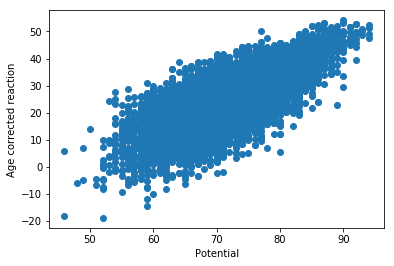

In [25]:
coef = 1.47;
plt.scatter(df['Potential'], df['Reactions']-coef*df['Age']);
plt.xlabel('Potential');
plt.ylabel('Age corrected reaction');
print('Correlation:', (df['Reactions']-coef*df['Age']).corr(df['Potential']));

## Geography

In [3]:
import folium
import json

In [4]:
geojson = json.load(open('countries.geo.json'));
geoCountries = [country['properties']['name'] for country in geojson['features']]
set(df['Nationality']) - set(geoCountries) #missing countries

{'Antigua & Barbuda',
 'Barbados',
 'Bosnia Herzegovina',
 'Brunei Darussalam',
 'Cape Verde',
 'Central African Rep.',
 'China PR',
 'Comoros',
 'Congo',
 'Curacao',
 'DR Congo',
 'England',
 'FYR Macedonia',
 'Faroe Islands',
 'Gibraltar',
 'Grenada',
 'Guam',
 'Hong Kong',
 'Korea DPR',
 'Korea Republic',
 'Liechtenstein',
 'Mauritius',
 'Montserrat',
 'Northern Ireland',
 'Palestine',
 'Republic of Ireland',
 'San Marino',
 'Scotland',
 'Serbia',
 'St Kitts Nevis',
 'St Lucia',
 'São Tomé & Príncipe',
 'Tanzania',
 'Trinidad & Tobago',
 'United States',
 'Wales'}

In [45]:
#sorry
df.replace('Antigua & Barbuda', 'Puerto Rico', inplace=True);
df.replace('DR Congo', 'Democratic Republic of the Congo', inplace=True);
df.replace('Trinidad & Tobago', 'Trinidad and Tobago', inplace=True);
df.replace('Montserrat', 'United Kingdom', inplace=True);
df.replace('United States', 'United States of America', inplace=True);
df.replace('Comoros', 'Madagascar', inplace=True);
df.replace('Korea Republic', 'South Korea', inplace=True);
df.replace('Guam', 'United States of America', inplace=True);
df.replace('Brunei Darussalam', 'Brunei', inplace=True);
df.replace('Tanzania', 'United Republic of Tanzania', inplace=True);
df.replace('Northern Ireland', 'United Kingdom', inplace=True);
df.replace('Korea DPR', 'North Korea', inplace=True);
df.replace('FYR Macedonia', 'Macedonia', inplace=True);
df.replace('China PR', 'China', inplace=True);
df.replace('Central African Rep.', 'Central African Republic', inplace=True);
df.replace('Faroe Islands', 'Denmark', inplace=True);
df.replace('Barbados', 'Trinidad and Tobago', inplace=True);
df.replace('Bosnia Herzegovina', 'Bosnia and Herzegovina', inplace=True);
df.replace('Liechtenstein', 'Switzerland', inplace=True);
df.replace('Scotland', 'United Kingdom', inplace=True);
df.replace('Mauritius', 'Mauritania', inplace=True);
df.replace('Wales', 'United Kingdom', inplace=True);
df.replace('St Kitts Nevis', 'Puerto Rico', inplace=True);
df.replace('Serbia', 'Republic of Serbia', inplace=True);
df.replace('Hong Kong', 'China', inplace=True);
df.replace('Cape Verde', 'Senegal', inplace=True);
df.replace('Republic of Ireland', 'Ireland', inplace=True);
df.replace('Grenada', 'Trinidad and Tobago', inplace=True);
df.replace('Gibraltar', 'Spain', inplace=True);
df.replace('Curacao', 'Venezuela', inplace=True);
df.replace('San Marino', 'Italy', inplace=True);
df.replace('Congo', 'Republic of the Congo', inplace=True);
df.replace('Palestine', 'West Bank', inplace=True); # ???
df.replace('St Lucia', 'Trinidad and Tobago', inplace=True);
df.replace('São Tomé & Príncipe', 'Gabon', inplace=True);
df.replace('England', 'United Kingdom', inplace=True);

**Countries, represented in the dataset**

In [25]:
m = folium.Map(location=[35,10], zoom_start=2);
folium.GeoJson(
    geojson,
    style_function = lambda feature: {
        'fillColor': 'green' if feature['properties']['name'] in df['Country'].tolist() else
                     'yellow' if feature['properties']['name'] in df['Nationality'].tolist() else 'white',
        'weight': 0
    }
).add_to(m);
print('Green - as Country');
print('Yellow - as Nationality only');
m

Green - as Country
Yellow - as Nationality only


In [177]:
def color(rgb):
    return 'rgb({},{},{})'.format(rgb[0]*255, rgb[1]*255, rgb[2]*255);
def dataColor(series, feature):
    normSer = (series - series.min())/(series.max() - series.min());
    value = int(normSer[feature['properties']['name']]*255);
    return color(plt.cm.coolwarm(value));
def isInC(feature):
    return feature['properties']['name'] in df['Country'].tolist();
def isInN(feature):
    return feature['properties']['name'] in df['Nationality'].tolist();
def drawMap(series, isIn):
    m = folium.Map(location=[35,10], zoom_start=2);
    folium.GeoJson(
        geojson,
        style_function = lambda feature: {
            'fillColor': dataColor(series, feature) if isIn(feature) else 'white',
            'weight': 0
        }
    ).add_to(m);
    print('  Top 5');
    print(series.sort_values(ascending=False).head(5));
    return m;

In [28]:
# by formula from slides
def gini(x):
    # (Warning: This is a concise implementation, but it is O(n**2)
    # in time and memory, where n = len(x).  *Don't* pass in huge
    # samples!)

    # Mean absolute difference
    mad = np.abs(np.subtract.outer(x, x)).mean()
    # Relative mean absolute difference
    rmad = mad/np.mean(x)
    # Gini coefficient
    g = 0.5 * rmad
    return g

In [95]:
# faster
def gini(array):
    """Calculate the Gini coefficient of a numpy array."""
    # based on bottom eq: http://www.statsdirect.com/help/content/image/stat0206_wmf.gif
    # from: http://www.statsdirect.com/help/default.htm#nonparametric_methods/gini.htm
    if np.amin(array) < 0:
        array -= np.amin(array) #values cannot be negative
    array += 0.0000001 #values cannot be 0
    array = np.sort(array) #values must be sorted
    index = np.arange(1,array.shape[0]+1) #index per array element
    n = array.shape[0]#number of array elements
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array))) #Gini coefficient

In [150]:
geoMeanC = df.groupby('Country').mean();
geoMeanN = df.groupby('Nationality').mean();

In [195]:
drawMap(geoMeanN['Overall'], isInN)

  Top 5
Nationality
Oman          73.000000
Cuba          73.000000
Mozambique    72.333333
Guatemala     72.000000
Syria         71.400000
Name: Overall, dtype: float64


In [178]:
drawMap(geoMeanC['Overall'], isInC)

  Top 5
Country
Ukraine    74.500000
Greece     71.181818
Brazil     70.496875
Chile      70.478125
Spain      70.440984
Name: Overall, dtype: float64


Overall of best club in the country

In [217]:
maxClub = df.groupby('Country').apply(lambda dfc: dfc.groupby('Club')['Overall'].mean().max());
drawMap(maxClub, isInC)

  Top 5
Country
Spain             82.560000
Italy             81.653846
Germany           79.423077
France            77.964286
United Kingdom    77.696970
dtype: float64


In [169]:
giniCoefsC = [gini(geoMeanC[col]) for col in geoMeanC];
geoSortedC = pd.Series(giniCoefsC, index=geoMeanC.columns).sort_values(ascending=False);
geoSortedC.head(10)

Wage                  0.463542
Value                 0.412207
League Level          0.093960
Long shots            0.048114
Free kick accuracy    0.046684
Volleys               0.046634
Curve                 0.046288
Shot power            0.042711
Composure             0.042315
Reactions             0.039806
dtype: float64

In [179]:
drawMap(geoMeanC['Wage'], isInC)

  Top 5
Country
Spain             20886.885246
Russia            19750.556793
Italy             19056.876061
United Kingdom    18704.286671
Turkey            16651.911469
Name: Wage, dtype: float64


In [144]:
giniCoefsN = [gini(geoMeanN[col]) for col in geoMeanN];
geoSortedN = pd.Series(giniCoefsN, index=geoMeanN.columns).sort_values(ascending=False);
geoSortedN.head(10)

Value              0.410730
Wage               0.373874
GK reflexes        0.242346
GK positioning     0.230237
GK kicking         0.226217
GK diving          0.222567
GK handling        0.220001
Marking            0.131565
Sliding tackle     0.131502
Standing tackle    0.125580
dtype: float64

In [181]:
drawMap(geoMeanN['Value'], isInN)

  Top 5
Nationality
Gabon                 7.328077e+06
Croatia               5.165046e+06
Dominican Republic    4.896667e+06
Algeria               4.766250e+06
Egypt                 4.733500e+06
Name: Value, dtype: float64


Gabon ?

In [147]:
print('Average value: {:.3}M'.format(df['Value'].mean()/1e6));
print('Gabon avg value: {:.3}M'.format(geoMeanN['Value']['Gabon']/1e6));

Average value: 2.39M
Gabon avg value: 9.09M


In [70]:
df[df['Nationality']=='Gabon'].loc[:,:'Wage']

Name  Age Nationality  Overall  Potential  \
ID                                                                   
188567          P. Aubameyang   28       Gabon       88         88   
212811              M. Lemina   23       Gabon       77         83   
218359               D. Ndong   23       Gabon       74         81   
188270        B. Ecuélé Manga   28       Gabon       72         72   
205998         A. Biyogo Poko   24       Gabon       72         76   
225951             D. Bouanga   22       Gabon       70         79   
209890         Y. Musavu-King   25       Gabon       70         73   
213498  S. Martinsson Ngouali   25       Gabon       68         73   
212483              J. Obiang   23       Gabon       66         70   
175141               D. Ovono   34       Gabon       66         66   
240659              Luís Leal   30       Gabon       64         64   
199963          M. Tandjigora   27       Gabon       63         63   
220271              M. Evouna   24       Gabon       60         65   

                        Club                     League  League Level  \
ID                                                                      
188567     Borussia Dortmund         German Bundesliga              1   
212811           Southampton    English Premier League              1   
218359            Sunderland      English Championship              2   
188270          Cardiff City      English Championship              2   
205998  Kardemir Karabükspor         Turkish Süper Lig              1   
225951            FC Lorient            French Ligue 2              2   
209890         FC St. Gallen        Swiss Super League              1   
213498           Hammarby IF       Swedish Allsvenskan              1   
212483          ES Troyes AC            French Ligue 1              1   
175141              Paris FC            French Ligue 2              2   
240659     Newell's Old Boys    Argentinian Superliga               1   
199963      CF Os Belenenses  Portuguese Primeira Liga              1   
220271      Atiker Konyaspor         Turkish Süper Lig              1   

               Country         Region       Value      Wage  
ID                                                           
188567         Germany         Europe  61000000.0  165000.0  
212811  United Kingdom         Europe  12000000.0   68000.0  
218359  United Kingdom         Europe   8000000.0   10000.0  
188270  United Kingdom         Europe   2500000.0   20000.0  
205998          Turkey         Europe   4000000.0   10000.0  
225951          France         Europe   2700000.0    6000.0  
209890     Switzerland         Europe   1900000.0   16000.0  
213498          Sweden         Europe   1200000.0    4000.0  
212483          France         Europe    700000.0    5000.0  
175141          France         Europe    260000.0    2000.0  
240659       Argentina  South America    425000.0    5000.0  
199963        Portugal         Europe    300000.0    2000.0  
220271          Turkey         Europe    280000.0    3000.0

Underpayed players

In [190]:
drawMap(geoMeanN['Overall']/geoMeanN['Wage'], isInN)

  Top 5
Nationality
Guatemala     0.0720
Namibia       0.0645
Vietnam       0.0610
Sri Lanka     0.0600
Kyrgyzstan    0.0580
dtype: float64


In [188]:
drawMap(geoMeanC['Overall']/geoMeanC['Wage'], isInC)

  Top 5
Country
Ukraine           0.074500
Greece            0.071182
Czech Republic    0.069821
South Africa      0.066393
Finland           0.059963
dtype: float64


Remaining pottential

In [193]:
drawMap(geoMeanC['Potential']-geoMeanC['Overall'], isInC)

  Top 5
Country
Finland           7.222222
Switzerland       6.907692
Denmark           6.489011
Ireland           6.414634
United Kingdom    6.147689
dtype: float64


In [194]:
drawMap(geoMeanN['Potential']-geoMeanN['Overall'], isInN)

  Top 5
Nationality
Brunei         14.0
China          11.0
Sri Lanka      10.0
Afghanistan    10.0
Thailand        9.5
dtype: float64


## Formation

**Hypothesis:** Team pick it's highest rated players for a game. *(often enough)*

In [135]:
def getFormation(data):
    team = data[data['Preferred Positions'] != 'GK'];
    team = team.sort_values('Overall', ascending=False).head(10);
    defenders = team[team['Preferred Positions'].isin({'LB', 'CB', 'RB', 'LWB', 'RWB'})];
    midfielders = team[team['Preferred Positions'].isin({'LM', 'CM', 'RM', 'CDM', 'CAM'})];
    forwards = team[team['Preferred Positions'].isin({'LW', 'ST', 'RW', 'CF'})];
    return (len(defenders), len(midfielders), len(forwards));

In [160]:
df.groupby('Club').apply(getFormation).mode()

0    (4, 4, 2)
dtype: object

## Position values

From generating best team, we can see, that we ususaly can afford the best goalkeeper, but forwards do not have a good a overall, with our money limitation. From that we can make an hypothesis, that value of the players grow, as they play farther forward in the field.

Instead of using the mean(values are too spread, and their mean will be the same), we will use the median.

In [15]:
posValues = df.groupby('Preferred Positions')['Value'].median().sort_values();
posValues

Preferred Positions
GK      375000.0
RB      600000.0
LB      625000.0
CB      675000.0
CM      700000.0
LWB     700000.0
CDM     775000.0
RW      775000.0
ST      775000.0
RM      800000.0
RWB     800000.0
LM      875000.0
CAM     900000.0
LW      925000.0
CF     1100000.0
Name: Value, dtype: float64

Even from this list, we can see the order, but let's apply sime statistical tools.

In [93]:
valueOrder = posValues.reset_index().reset_index().set_index('Preferred Positions')['index'];
fieldOrder = pd.Series(['GK', 'CB', 'LB', 'RB', 'LWB', 'RWB', 'CDM', 'CM', 'LM', 'RM', 'CAM', 'LW', 'RW', 'CF', 'ST'])\
    .reset_index().set_index(0)['index'];
pd.DataFrame(fieldOrder, order, columns=['f', 'o']);
scoreTable = pd.DataFrame(valueOrder).join(fieldOrder, lsuffix='Value', rsuffix='Field');
scoreTable

indexValue  indexField
Preferred Positions                        
GK                            0           0
RB                            1           3
LB                            2           2
CB                            3           1
CM                            4           7
LWB                           5           4
CDM                           6           6
RW                            7          12
ST                            8          14
RM                            9           9
RWB                          10           5
LM                           11           8
CAM                          12          10
LW                           13          11
CF                           14          13

In [94]:
seriesScore = sum(scoreTable.apply(lambda row: abs(row['indexValue'] - row['indexField']), axis=1));
seriesScore

32

In [96]:
def probabilityScore(n):
    # expected value of the score
    # numerator consider all posible scores of pairs
    # denominator is number of pairs from n (binom(n, 2))
    return n * sum([i*(n-i) for i in range(n)]) / (n * (n - 1) / 2);
probabilityScore(15)

80.0

32 < 40 = 80/2

Our score is less then a half of that of the random series, which mean, we accept our hypothesis.

In [95]:
valueOrder.corr(fieldOrder)

0.78214285714285703

Also, their orders are highly correlated, that confirms our hypothesis.